Redes Neurais sequencias para previsão de evasão de clientes

In [287]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as srn
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [288]:
#Importação dos dados
data = pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Análise dos Dados através de gráficos

In [290]:
#Visualização do tipo dos dados
for i in data.columns:
    print(data[i].dtype)

int64
int64
object
int64
object
object
int64
int64
float64
int64
int64
int64
float64
int64


In [291]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [292]:
data = data.drop(columns= ['RowNumber', 'CustomerId', 'Surname'])

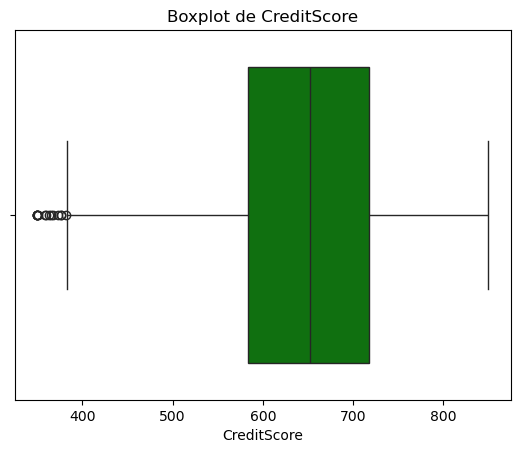

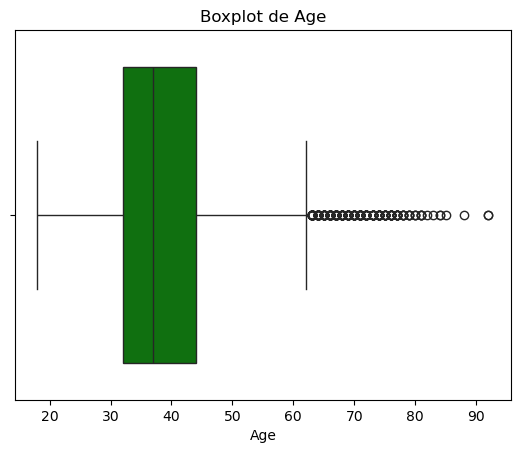

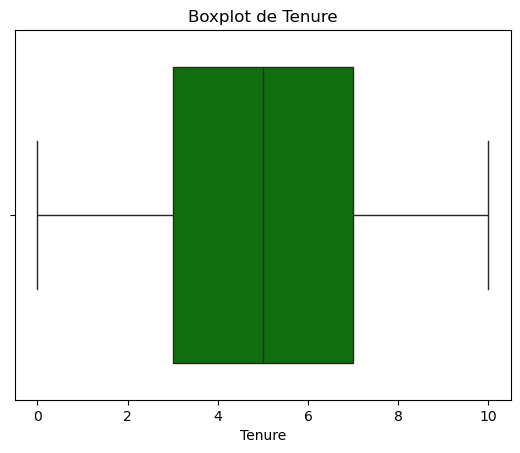

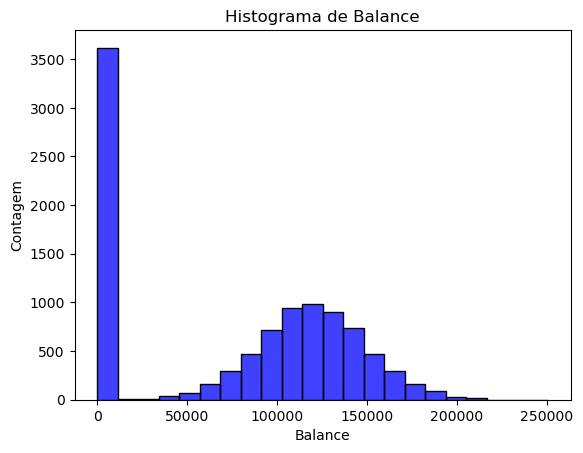

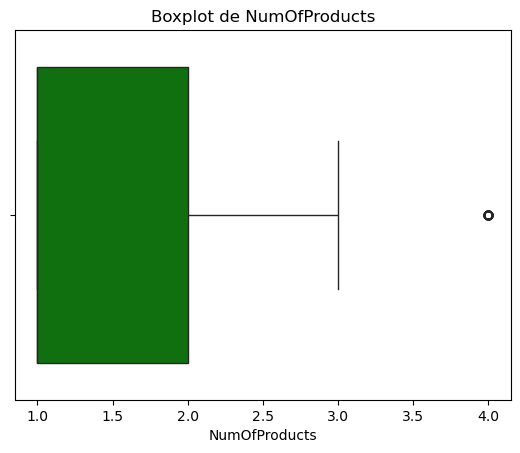

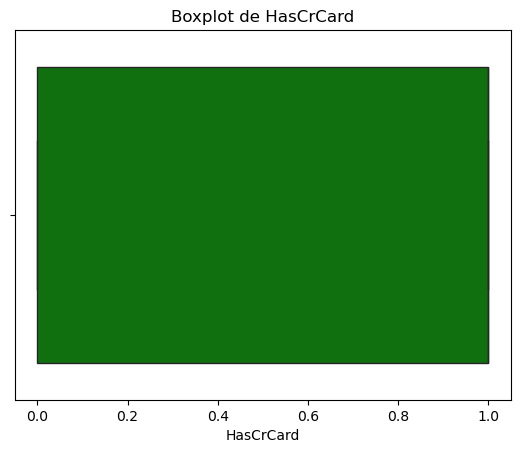

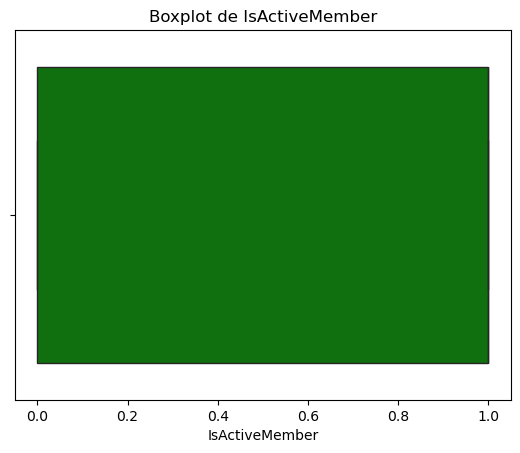

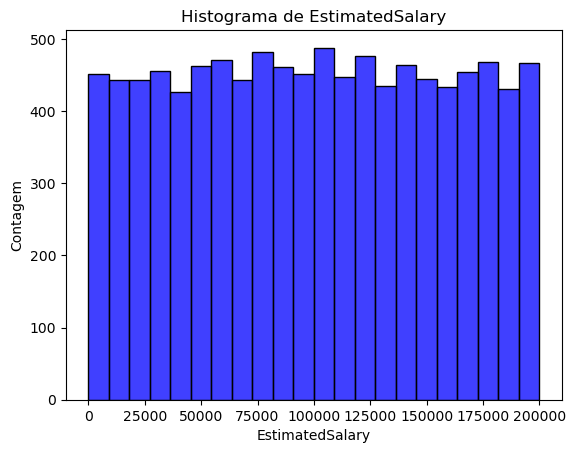

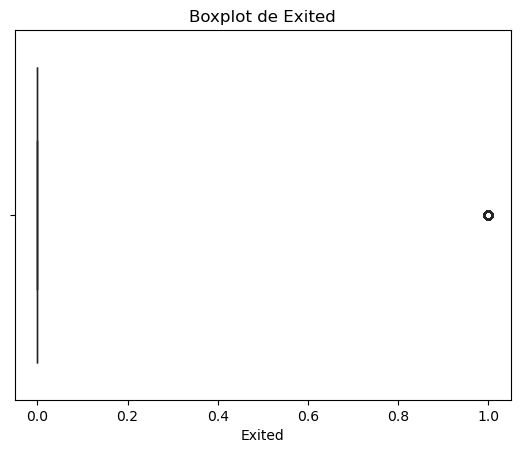

In [293]:
#Alguns gráficos para análise
for coluna in data.columns:
    if data[coluna].dtype == 'int64':
        srn.boxplot(x = coluna, data = data, color = 'green')
        plt.title(f"Boxplot de {coluna}")
        plt.xlabel(coluna)
        plt.show()
    if data[coluna].dtype == 'float64':
        srn.histplot(data[coluna], color = 'blue')
        plt.title(f"Histograma de {coluna}")
        plt.ylabel("Contagem")
        plt.xlabel(coluna)
        plt.show()

Início da Análise Descritiva

In [295]:
list(data.columns)

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [296]:
cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','IsActiveMember']

In [297]:
for valores in cols:
    descrit = data[valores].describe()
    print(descrit, "\n")

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64 

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64 

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64 

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64 

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max    

Mais Alguns Gráficos

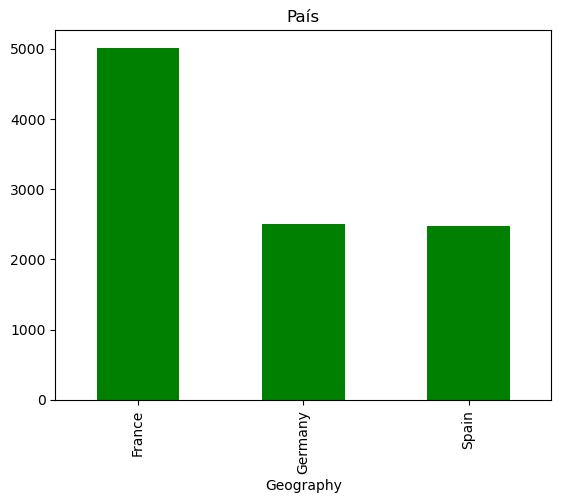

In [299]:
data['Geography'].value_counts().plot(kind = 'bar', color = 'green')
plt.title("País")
plt.show()

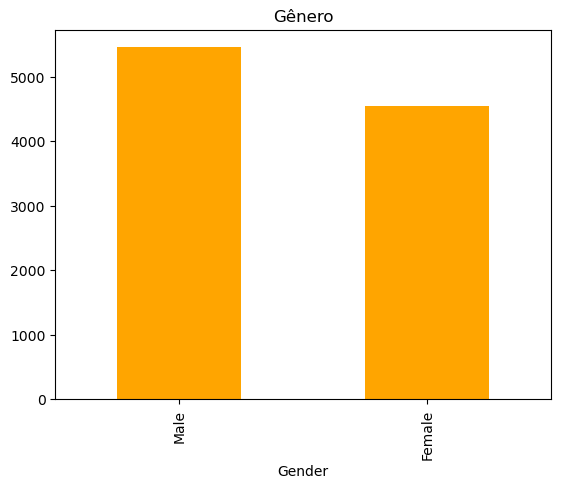

In [300]:
data["Gender"].value_counts().plot(kind = 'bar', color = 'orange')
plt.title("Gênero")
plt.show()

In [301]:
data.head().sort_values('EstimatedSalary')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


Separação dos dados

In [303]:
X = data.iloc[:,0:10]
y = data.iloc[:,-1]
X.shape

(10000, 10)

In [304]:
categorical = X.select_dtypes(include = 'object').columns
labelencoder = LabelEncoder()
for cols in categorical:
    X[cols] = labelencoder.fit_transform(X[cols])

In [305]:
numerical = X.select_dtypes(include = ['int64', 'float64']).columns
sc = StandardScaler()
X[numerical] = sc.fit_transform(X[numerical])

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Criação do Modelo

In [308]:
model = Sequential()

model.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu', input_dim=(X_train.shape[1])))
model.add(Dropout(0.2))


model.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


C:\Users\roni_\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [309]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 100, restore_best_weights = True)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['f1_score', 'accuracy'])

In [310]:
model.fit(X_train, y_train, epochs = 500, callbacks = [es], batch_size = 10, validation_data=(X_test, y_test))

Epoch 1/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7863 - f1_score: 0.3413 - loss: 0.4906 - val_accuracy: 0.8560 - val_f1_score: 0.3430 - val_loss: 0.3890
Epoch 2/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8398 - f1_score: 0.3390 - loss: 0.3891 - val_accuracy: 0.8580 - val_f1_score: 0.3430 - val_loss: 0.3665
Epoch 3/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8534 - f1_score: 0.3304 - loss: 0.3513 - val_accuracy: 0.8567 - val_f1_score: 0.3430 - val_loss: 0.3537
Epoch 4/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8440 - f1_score: 0.3411 - loss: 0.3759 - val_accuracy: 0.8607 - val_f1_score: 0.3430 - val_loss: 0.3509
Epoch 5/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8573 - f1_score: 0.3285 - loss: 0.3545 - val_accuracy: 0.8577 - val_f1_score: 0.3430 - val_loss: 0.3501
Epoch 6/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8497 - f1_score: 0.3413 - loss: 0.3634 - val_accuracy: 0.8567 - val_f1_score: 





Métricas para Avaliação

In [312]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 100)            │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,505 (369.16 KB)

 Trainable params: 31,501 (123.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,004 (246.11 KB)

In [313]:
y_pred = model.predict(X_test)
y_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.26474985],
       [0.25866845],
       [0.24338165],
       ...,
       [0.0715564 ],
       [0.07016539],
       [0.5769993 ]], dtype=float32)

In [314]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [315]:
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [316]:
print(f"Matriz de Confusão: \n {confusion}")

Matriz de Confusão: 
 [[2282   97]
 [ 319  302]]


In [317]:
print("Métricas para avaliação: ")
print(f"Acurácia: {accuracy} \n F1-Score: {f1} \n Classification-report: \n {report}")

Métricas para avaliação: 
Acurácia: 0.8613333333333333 
 F1-Score: 0.592156862745098 
 Classification-report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.76      0.49      0.59       621

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000

